<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Kamyar Kazari, Mahdi Shafiei
### Student Number : 99102037, 99109409
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [1]:
## used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/METABRIC_RNA_Mutation.csv')
print(df.shape)
df.head()

(1904, 693)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
## Load Clinical dataset:

clinical_features_to_drop = df.columns[31:]
clinical_df = df.loc[:,"patient_id":"death_from_cancer"]
print(clinical_df.shape)
clinical_df.head()

(1904, 31)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
## Load Mutation dataset:

mutation_df = df.loc[:, "pik3ca_mut":"siah1_mut"]
mutation_df.insert(loc=173 , column='overall_survival', value=df['overall_survival'])
mutation_df.insert(loc=0 , column='patient_id', value=df['patient_id'])
print(mutation_df.shape)
mutation_df.head()

(1904, 175)


,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,overall_survival
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## Load Gene Expressions dataset

gene_expressions_df = df.loc[:, "brca1":"ugt2b7"]
gene_expressions_df['overall_survival'] = df['overall_survival']
print(gene_expressions_df.shape)
gene_expressions_df.head()

(1904, 490)


,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0


## EDA

For each dataset, you must perform a sufficient EDA.

In [6]:
## EDA for clinical data:

clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

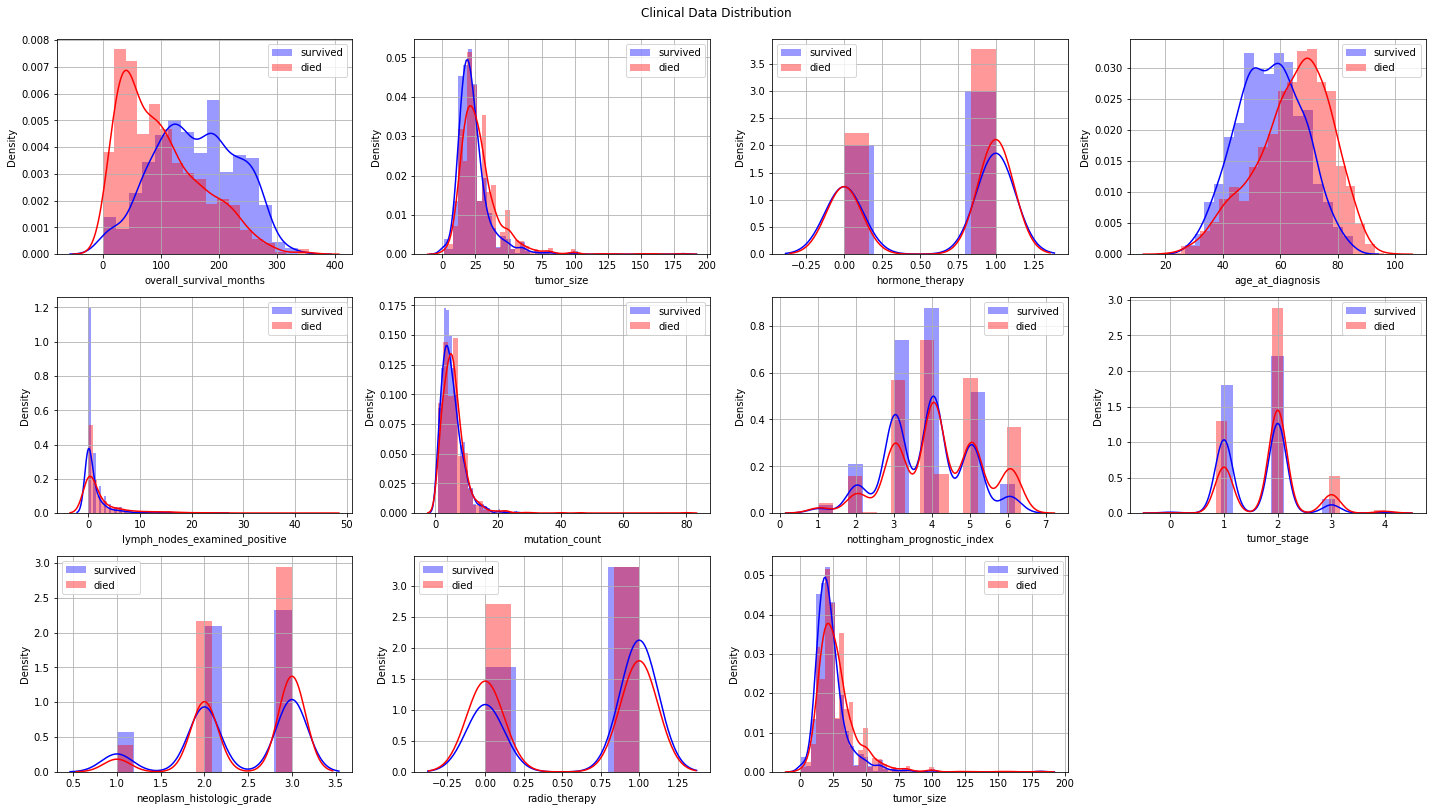

In [7]:
fig = plt.figure(figsize = (20, 22))
cols = ['overall_survival_months', 'tumor_size', 'hormone_therapy',
        'age_at_diagnosis', 'lymph_nodes_examined_positive',
        'mutation_count','nottingham_prognostic_index',
        'tumor_stage', 'neoplasm_histologic_grade',
        'radio_therapy', 'tumor_size']

j = 0
for i in clinical_df[cols].columns:
  plt.subplot(6, 4, j+1)
  j += 1
  sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='b', label = 'survived')
  sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label = 'died')
  plt.legend(loc='best')
  plt.grid()
fig.suptitle('Clinical Data Distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

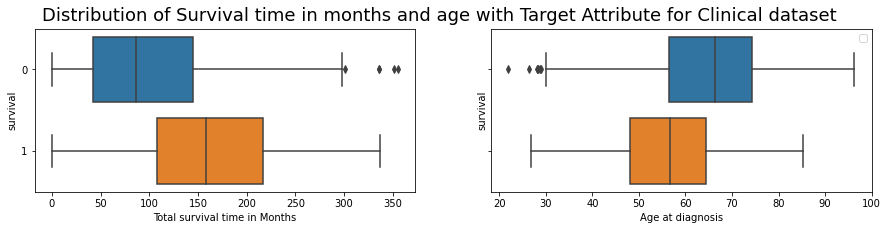

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=clinical_df, ax=ax[0])
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[1])

fig.suptitle('Distribution of Survival time in months and age with Target Attribute for Clinical dataset', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('survival')
plt.legend()
plt.show()

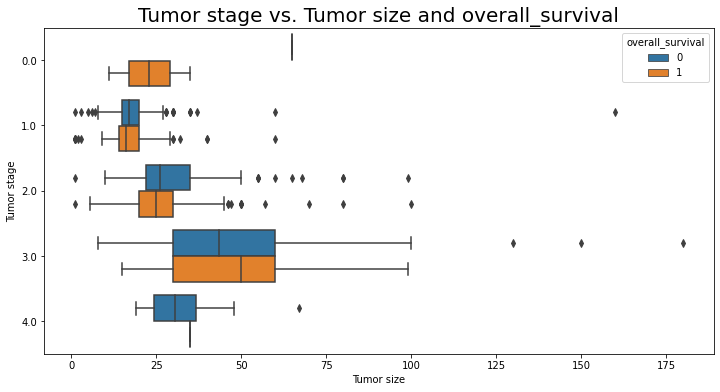

In [9]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_size', y ='tumor_stage', data = clinical_df, orient='h',
                 hue='overall_survival')

ax.set_ylabel('Tumor stage')
ax.set_xlabel('Tumor size')
plt.title('Tumor stage vs. Tumor size and overall_survival', fontsize=20)

plt.show()

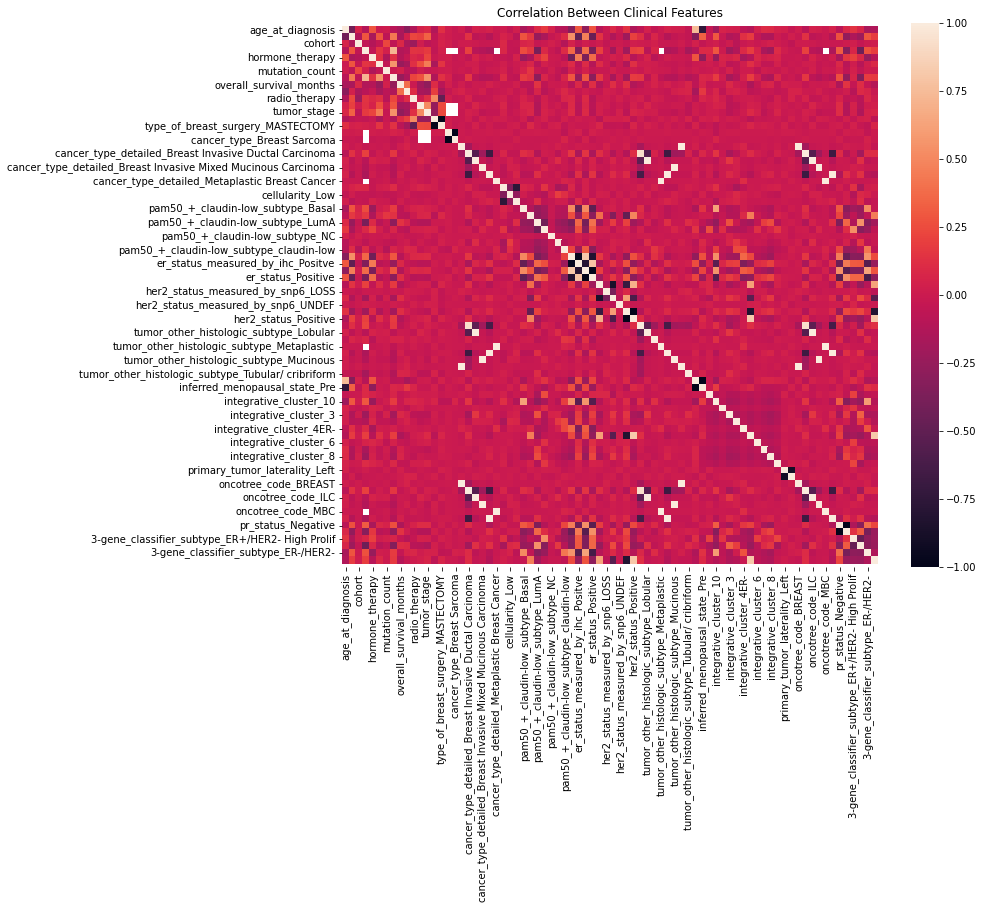

In [10]:
fig, axs = plt.subplots(figsize = (12, 10)) 
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id', 'death_from_cancer']
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns=categorical_columns)
mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = np.bool))
sns.heatmap(no_id_clinical_df.corr(), ax = axs)
plt.title('Correlation Between Clinical Features')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show()

In [11]:
Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df.head(10)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif,0.094463
pam50_+_claudin-low_subtype_claudin-low,0.091397
integrative_cluster_10,0.076256
pam50_+_claudin-low_subtype_LumA,0.065186
3-gene_classifier_subtype_ER-/HER2-,0.065135


In [12]:
## EDA for gene expression

gene_expressions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 490 entries, brca1 to overall_survival
dtypes: float64(489), int64(1)
memory usage: 7.1 MB


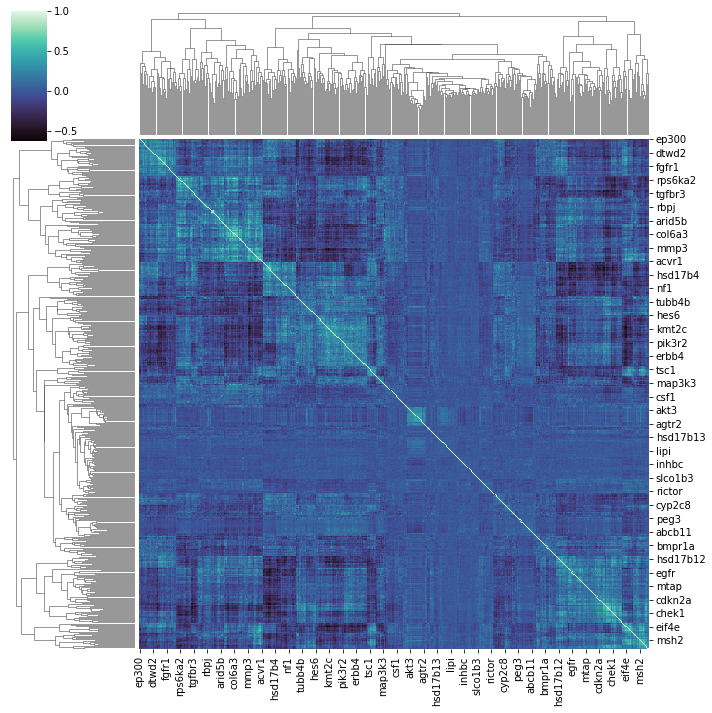

In [13]:
sns.clustermap(gene_expressions_df.corr(), cmap = 'mako')

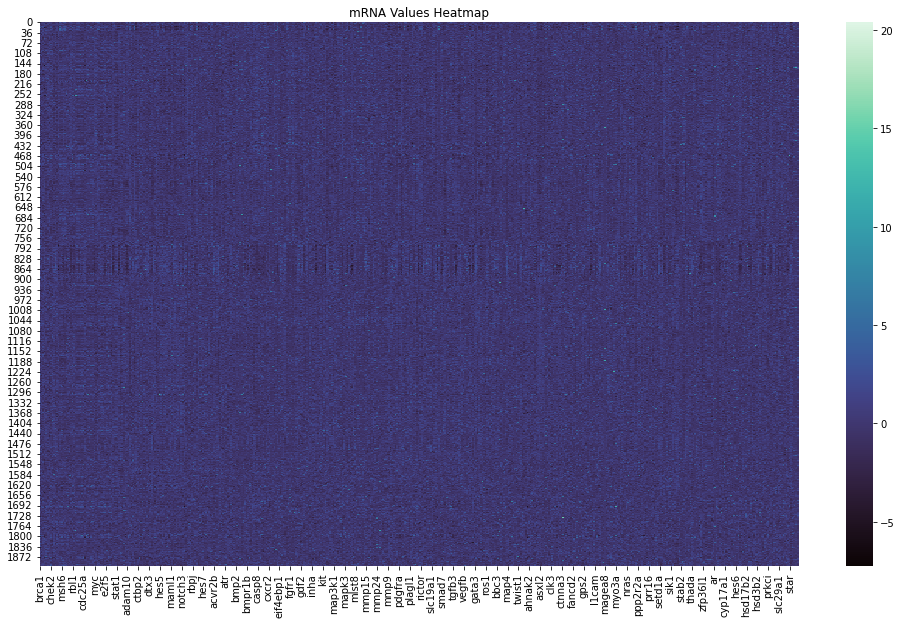

In [14]:
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(gene_expressions_df.drop(['overall_survival'], axis=1), ax = axs, cmap = 'mako')
plt.title('mRNA Values Heatmap')
plt.show()


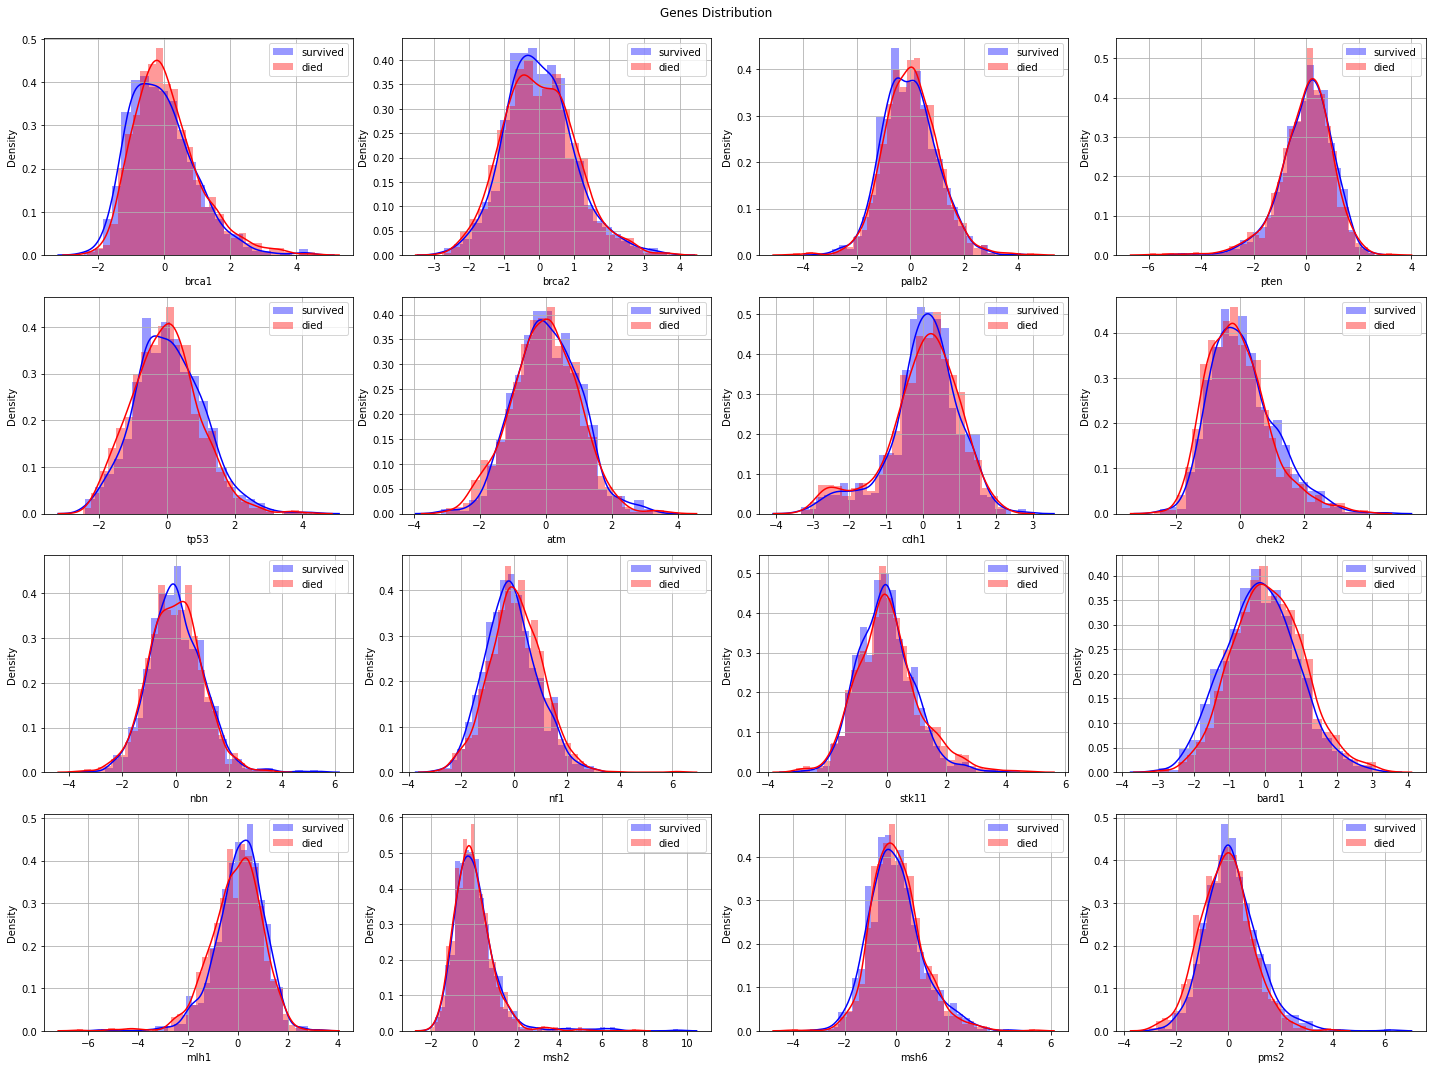

In [15]:
fig = plt.figure(figsize = (20, 22))
j = 0

gene_list = gene_expressions_df.columns.tolist()[:16]
for i in gene_expressions_df.loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(gene_expressions_df[i][gene_expressions_df['overall_survival']==1], color='b', label='survived')
    sns.distplot(gene_expressions_df[i][gene_expressions_df['overall_survival']==0], color='r', label='died')
    plt.legend(loc='best')
    plt.grid()
fig.suptitle('Genes Distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [16]:
## Due to large dimension of 'gene expression dataset', dimetiality redustion for
## this datset is necessary. So dimension of data in this dataset will be reduced
## from 489 to 80. 
## Autoencoder has been used for dimensionality reduction.

raw = gene_expressions_df.drop('overall_survival',axis=1).copy()
categorical_feature_mask = raw.dtypes == object
cateforical_cols = raw.columns[categorical_feature_mask].tolist()
data = raw.astype(float)

X_total_gene = data.values
y_total_gene = gene_expressions_df['overall_survival'].values

print(X_total_gene.shape)
print(y_total_gene.shape)

(1904, 489)
(1904,)


In [17]:
## Split Gene Expression dataset:

X_train_gene, X_test_gene, y_train_gene, y_test_gene = train_test_split(X_total_gene,
                                                                        y_total_gene,
                                                                        test_size = 0.1,
                                                                        random_state = 42)
print(X_train_gene.shape)
print(X_test_gene.shape)

(1713, 489)
(191, 489)


In [18]:
## AutoEncoder model:

input_data = keras.Input(489)
x = layers.Dense(300, activation='relu')(input_data)
encoded = layers.Dense(80, activation='relu')(x)

x = layers.Dense(300, activation='relu')(encoded)
decoded = layers.Dense(489, activation='sigmoid')(x)

autoencoder = keras.Model(input_data, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_gene, X_train_gene, epochs=200, batch_size=50, validation_data=(X_test_gene, X_test_gene))

encoder = keras.Model(input_data, encoded)
X_train_gene_reduced = encoder.predict(X_train_gene)
X_test_gene_reduced = encoder.predict(X_test_gene)

Epoch 1/200
35/35 [==============================] - 2s 24ms/step - loss: 1.0545 - val_loss: 0.9146
Epoch 2/200
35/35 [==============================] - 1s 17ms/step - loss: 0.9720 - val_loss: 0.8821
Epoch 3/200
35/35 [==============================] - 0s 13ms/step - loss: 0.9364 - val_loss: 0.8503
Epoch 4/200
35/35 [==============================] - 0s 11ms/step - loss: 0.9014 - val_loss: 0.8223
Epoch 5/200
35/35 [==============================] - 0s 10ms/step - loss: 0.8742 - val_loss: 0.8034
Epoch 6/200
35/35 [==============================] - 0s 11ms/step - loss: 0.8527 - val_loss: 0.7869
Epoch 7/200
35/35 [==============================] - 0s 11ms/step - loss: 0.8361 - val_loss: 0.7765
Epoch 8/200
35/35 [==============================] - 0s 11ms/step - loss: 0.8229 - val_loss: 0.7675
Epoch 9/200
35/35 [==============================] - 0s 10ms/step - loss: 0.8120 - val_loss: 0.7605
Epoch 10/200
35/35 [==============================] - 0s 10ms/step - loss: 0.8022 - val_loss: 0.7546

In [19]:
print('Reduced Train Dimensions:')
print(X_train_gene_reduced.shape)
print(y_train_gene.shape)
print()
print('Reduced Test Dimensions:')
print(X_test_gene_reduced.shape)
print(y_test_gene.shape)

Reduced Train Dimensions:
(1713, 80)
(1713,)

Reduced Test Dimensions:
(191, 80)
(191,)


In [53]:
y_train_reshaped = np.reshape(y_train_gene,(y_train_gene.shape[0],1))
joined = np.concatenate((X_train_gene_reduced,y_train_reshaped),axis=1)
corr_matrix = np.corrcoef(joined,rowvar=False)
corr_to_target = corr_matrix[80][:80]
sorted_indices = np.argsort(np.abs(corr_to_target))[::-1]
for i in range(10):
    print("index of feature:",sorted_indices[i],"and the correlation of feature to target:",corr_to_target[sorted_indices[i]])

index of feature: 49 and the correlation of feature to target: -0.1672922499154979
index of feature: 69 and the correlation of feature to target: -0.14541344901067801
index of feature: 63 and the correlation of feature to target: 0.13881680487478706
index of feature: 0 and the correlation of feature to target: -0.13874010868874187
index of feature: 78 and the correlation of feature to target: -0.1308253733918748
index of feature: 79 and the correlation of feature to target: 0.11235464234489795
index of feature: 18 and the correlation of feature to target: -0.10999391115720847
index of feature: 4 and the correlation of feature to target: 0.1067878327525228
index of feature: 34 and the correlation of feature to target: -0.10286557118708453
index of feature: 23 and the correlation of feature to target: -0.0995146746202318


# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
## Split and prepare Clinical dataset

categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns]
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']
X_train_clinical, X_test_clinical, y_train_clinical, y_test_clinical = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

Accuracy of AdaBoost model on Clinical test dataset: 0.8015267175572519
f1 Score of AdaBoost model on Clinical test dataset: 0.7657657657657656



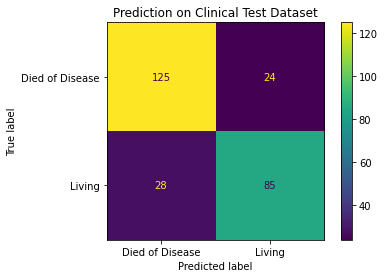

In [ ]:
## Adaboost model has been used for clinical dataset.

ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train_clinical, y_train_clinical)

pred = ada_boost.predict(X_test_clinical)

clinical_accuracy = metrics.accuracy_score(pred, y_test_clinical)
clinical_f1_score = metrics.f1_score(pred, y_test_clinical)

print('Accuracy of AdaBoost model on Clinical test dataset:', clinical_accuracy)
print('f1 Score of AdaBoost model on Clinical test dataset:', clinical_f1_score)
print()

confusion = metrics.confusion_matrix(y_test_clinical, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Died of Disease', 'Living'])
cm_display.plot()
plt.title('Prediction on Clinical Test Dataset')
plt.show()

Accuracy of AdaBoost model on Gene Expressions test dataset: 0.6020942408376964
f1 Score of AdaBoost model on Gene Expressions test dataset: 0.5



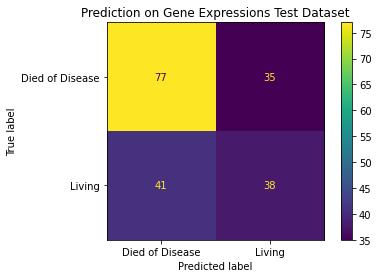

In [ ]:
## Adaboost for 'gene expressions' dataset:

ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train_gene, y_train_gene)
pred = ada_boost.predict(X_test_gene)

clinical_accuracy = metrics.accuracy_score(pred, y_test_gene)
clinical_f1_score = metrics.f1_score(pred, y_test_gene)

print('Accuracy of AdaBoost model on Gene Expressions test dataset:', clinical_accuracy)
print('f1 Score of AdaBoost model on Gene Expressions test dataset:', clinical_f1_score)
print()

confusion = metrics.confusion_matrix(y_test_gene, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Died of Disease', 'Living'])
cm_display.plot()
plt.title('Prediction on Gene Expressions Test Dataset')
plt.show()

Accuracy of AdaBoost model on Reduced Gene Expressions test dataset: 0.6073298429319371
f1 Score of AdaBoost model on Reduced Gene Expressions test dataset: 0.5098039215686275



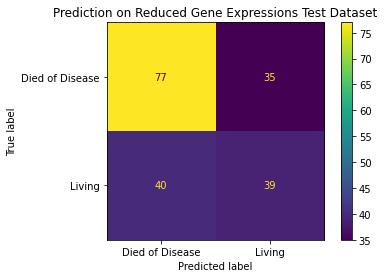

In [ ]:
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train_gene_reduced, y_train_gene)
pred = ada_boost.predict(X_test_gene_reduced)

clinical_accuracy = metrics.accuracy_score(pred, y_test_gene)
clinical_f1_score = metrics.f1_score(pred, y_test_gene)

print('Accuracy of AdaBoost model on Reduced Gene Expressions test dataset:', clinical_accuracy)
print('f1 Score of AdaBoost model on Reduced Gene Expressions test dataset:', clinical_f1_score)
print()

confusion = metrics.confusion_matrix(y_test_gene, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Died of Disease', 'Living'])
cm_display.plot()
plt.title('Prediction on Reduced Gene Expressions Test Dataset')
plt.show()

# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
print(X_train_clinical.shape,
X_train_gene.shape,
X_train_gene_reduced.shape)
#Model with only clinical data
input_lay = keras.Input(93)
batchnorm1 = layers.BatchNormalization()(input_lay)
model1_dense1 = layers.Dense(70,activation='relu')(batchnorm1)
model1_dense2 = layers.Dense(50,activation='relu')(model1_dense1)
drop1 = layers.Dropout(0.2)(model1_dense2)
model1_dense3 = layers.Dense(20,activation='relu')(drop1)
model1_dense4 = layers.Dense(10,activation='relu')(model1_dense3)
model1_dense5 = layers.Dense(1,activation='sigmoid')(model1_dense4)
model1 = keras.Model(input_lay,model1_dense5)
model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
hist = model1.fit(X_train_clinical, y_train_clinical, epochs=20, batch_size=32,validation_split=0.1)
_,accuracy = model1.evaluate(X_test_clinical, y_test_clinical)
print('Accuracy: %.2f' % (accuracy*100))


(1047, 93) (1713, 489) (1713, 80)
Epoch 1/20
30/30 [==============================] - 2s 10ms/step - loss: 0.6661 - accuracy: 0.6072 - val_loss: 0.6738 - val_accuracy: 0.5905
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6571 - val_loss: 0.6871 - val_accuracy: 0.6000
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.7070 - val_loss: 0.6422 - val_accuracy: 0.6381
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7463 - val_loss: 0.5888 - val_accuracy: 0.7048
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7665 - val_loss: 0.5461 - val_accuracy: 0.7238
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7633 - val_loss: 0.5244 - val_accuracy: 0.7429
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4309 - accuracy: 0.8036 - val_loss: 0.5105 - val_ac

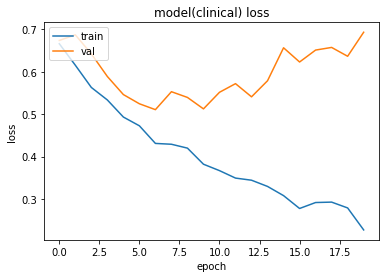

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model(clinical) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Model with only Gene Expression data
print(np.isnan(X_train_gene).any())
print(np.argwhere(np.isnan(X_train_gene)))
input_lay2 = keras.Input(489)
batchnorm2 = layers.BatchNormalization()(input_lay2)
model2_dense1 = layers.Dense(150,activation='relu')(batchnorm2)
model2_dense2 = layers.Dense(100,activation='relu')(model2_dense1)
model2_dense3 = layers.Dense(70,activation='relu')(model2_dense2)
model2_dense4 = layers.Dense(50,activation='tanh')(model2_dense3)
drop2 = layers.Dropout(0.2)(model2_dense4)
model2_dense5 = layers.Dense(20,activation='tanh')(drop2)
model2_dense6 = layers.Dense(10,activation='relu')(model2_dense5)
model2_dense7 = layers.Dense(1,activation='sigmoid')(model2_dense6)
model2 = keras.Model(input_lay2,model2_dense7)
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
hist2 = model2.fit(X_train_gene, y_train_gene, epochs=3, batch_size=32,validation_split=0.1)
_,accuracy = model2.evaluate(X_test_gene, y_test_gene)
print('Accuracy: %.2f' % (accuracy*100))

False
[]
Epoch 1/3
49/49 [==============================] - 2s 10ms/step - loss: 0.6598 - accuracy: 0.6055 - val_loss: 0.6539 - val_accuracy: 0.5930
Epoch 2/3
49/49 [==============================] - 0s 6ms/step - loss: 0.5951 - accuracy: 0.6833 - val_loss: 0.6689 - val_accuracy: 0.5988
Epoch 3/3
6/6 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.6126
Accuracy: 61.26


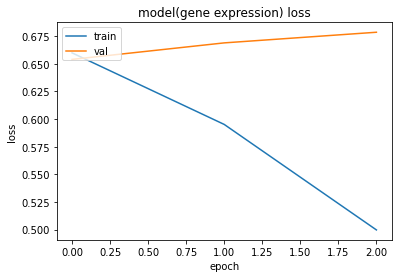

In [ ]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model(gene expression) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Model with only Reduced Gene Expression data
# print(np.isnan(X_train_gene).any())
# print(np.argwhere(np.isnan(X_train_gene)))
# print(X_train_gene_reduced.shape)
input_lay3 = keras.Input(80)
batchnorm3 = layers.BatchNormalization()(input_lay3)
model3_dense1 = layers.Dense(50,activation='tanh')(batchnorm3)
drop3 = layers.Dropout(0.2)(model3_dense1)
model3_dense2 = layers.Dense(20,activation='tanh')(drop3)
model3_dense3 = layers.Dense(10,activation='relu')(model3_dense2)
model3_dense4 = layers.Dense(1,activation='sigmoid')(model3_dense3)
model3 = keras.Model(input_lay3,model3_dense4)
model3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
hist3 = model3.fit(X_train_gene_reduced, y_train_gene, epochs=20, batch_size=32,validation_split=0.1)
_,accuracy = model3.evaluate(X_test_gene_reduced, y_test_gene)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
49/49 [==============================] - 1s 7ms/step - loss: 0.6832 - accuracy: 0.5685 - val_loss: 0.6694 - val_accuracy: 0.5814
Epoch 2/20
49/49 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6314 - val_loss: 0.6603 - val_accuracy: 0.5988
Epoch 3/20
49/49 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6314 - val_loss: 0.6443 - val_accuracy: 0.6512
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6645 - val_loss: 0.6350 - val_accuracy: 0.6628
Epoch 5/20
49/49 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.6833 - val_loss: 0.6295 - val_accuracy: 0.6744
Epoch 6/20
49/49 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6879 - val_loss: 0.6239 - val_accuracy: 0.6744
Epoch 7/20
49/49 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.6918 - val_loss: 0.6274 - val_accuracy: 0.6628
Epoch 8/20
49/49 [==

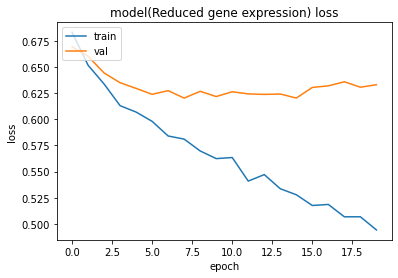

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model(Reduced gene expression) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

For comparison between using neural networks on the 3 different datasets, the accuracy of the first model(The model for clinical dataset) is significantly higher than the two others. This is partly because of the fact that some the parameters in the clinical data are more correlated to the target than others(take a look at the EDA part please). Also, we can clearly see that the first and third NN models needs more epochs than the other dataset.(Gene Expression overfits to the data even in the first epoch!)
If we compare the three Adaboost models, we can see that the model which was trained on clinical data has higher accuracy that the two other, confirming our guess about the fact that the clinical data set is a better choice for this problem.